In [ ]:
import tensorflow as ts


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#cv2 library is used to preprocess and manipulate image data (called as OpenCV)
#os library is used for interacting with the operating system and access to directories and folders and manipulate them accordingly


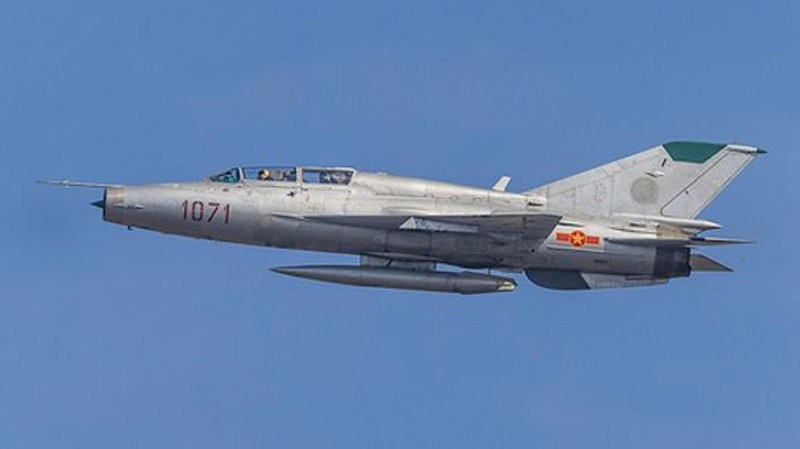

In [ ]:
img=image.load_img('/content/drive/MyDrive/nn-20240425T042532Z-001/nn/training/jets/14.jpg')
img

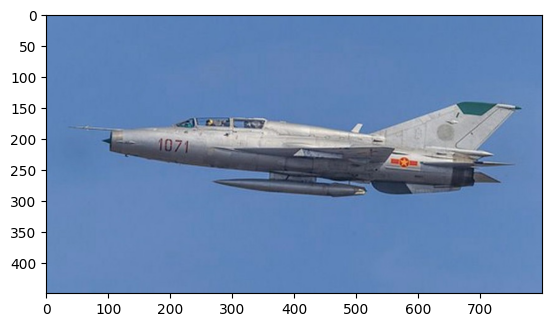

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread('/content/drive/MyDrive/nn-20240425T042532Z-001/nn/training/jets/14.jpg').shape
#449*800 - image size
#3 - rgb color

(449, 800, 3)

In [ ]:
train= ImageDataGenerator(rescale=1/255)
val=ImageDataGenerator(rescale=1/255)
#255 - highest pixel value
#original image size is huge with rgb coefficient 0 - 255,
#such values would be large for our model to understand hence we rescale it down to 1

In [ ]:
trd=train.flow_from_directory('/content/drive/MyDrive/nn-20240425T042532Z-001/nn/training',target_size=(200,200),batch_size=3,class_mode='binary')
#target_size is for the size of each image
#batch_size refers to the number of images to be trained together
#class_mode refers to the number of classes the dataset has

Found 28 images belonging to 2 classes.


In [ ]:
vd=train.flow_from_directory('/content/drive/MyDrive/nn-20240425T042532Z-001/nn/validation',target_size=(200,200),batch_size=3,class_mode='binary')

Found 12 images belonging to 2 classes.


In [ ]:
trd.classes
#o jet images
#1 logiczero images

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
vd.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model= ts.keras.models.Sequential([ts.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 ts.keras.layers.MaxPool2D(2,2),
                                 ts.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 ts.keras.layers.MaxPool2D(2,2),
                                 ts.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 ts.keras.layers.MaxPool2D(2,2),
                                 ts.keras.layers.Flatten(),
                                 ts.keras.layers.Dense(1,activation='sigmoid')
                                 ])
#tensorflow is used to create and work with NN
#keras is high level API whihc reduces the complexity of NNs by using its frameworks
# CNN is used along with sequential API
# 1. ts.keras.models.Sequential([]) defines linear stack of layers ,initialies seq model
# 2. ts.keras.Conv2D(16(3,3)),activation='relu',input_shape=(200,200,3)) -- addition of 16 filters of CNN layer with size (3,3) and relu(rectified linear unit) activation func, input_shape defines with shape of images (200,200)pixels with  channels(rgb)
# 3. MaxPool is used to reduce pooling size to 2x2
# 4. Flatten flattens the input to 1d layer which is required before passing it to a fully connected layer
# 5. Dense is used to add dense layer with 1 neuron and sigmoid activation function is used for binary classification tasks where output value is btw 0 to 1


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=ts.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['acc'])

In [ ]:
model.fit(trd,epochs=20,validation_data=vd)

Epoch 1/20
10/10 [==============================] - 10s 838ms/step - loss: 1.0478 - acc: 0.5714 - val_loss: 0.9176 - val_acc: 0.4167
Epoch 2/20
10/10 [==============================] - 1s 114ms/step - loss: 0.6651 - acc: 0.6429 - val_loss: 0.4668 - val_acc: 0.9167
Epoch 3/20
10/10 [==============================] - 1s 125ms/step - loss: 0.4488 - acc: 0.7857 - val_loss: 0.1457 - val_acc: 1.0000
Epoch 4/20
10/10 [==============================] - 2s 182ms/step - loss: 0.2318 - acc: 0.8929 - val_loss: 0.1353 - val_acc: 1.0000
Epoch 5/20
10/10 [==============================] - 2s 186ms/step - loss: 0.0982 - acc: 0.9643 - val_loss: 0.1704 - val_acc: 0.9167
Epoch 6/20
10/10 [==============================] - 1s 131ms/step - loss: 0.1102 - acc: 0.9643 - val_loss: 0.1255 - val_acc: 1.0000
Epoch 7/20
10/10 [==============================] - 1s 121ms/step - loss: 0.0411 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 8/20
10/10 [==============================] - 1s 124ms/step - loss: 0

In [ ]:
vd.class_indices

{'jets': 0, 'logiczero': 1}

In [ ]:
dir_path='/content/drive/MyDrive/nn-20240425T042532Z-001/nn/testing'
for i in os.listdir(dir_path):
  print(i)


t4.jpg
t6g.jpg
t2.jpg
t7g.jpg
dog2.jpg
t1.jpg
t3.jpg


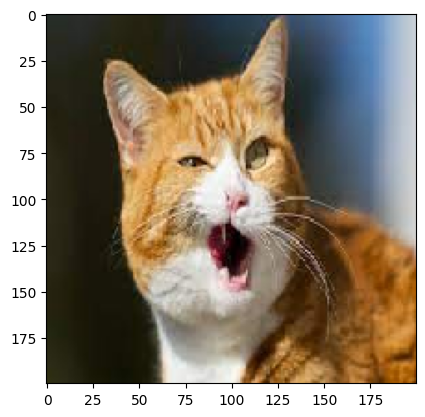

1/1 [==============================] - 0s 82ms/step
t4.jpg Jet Not Detected


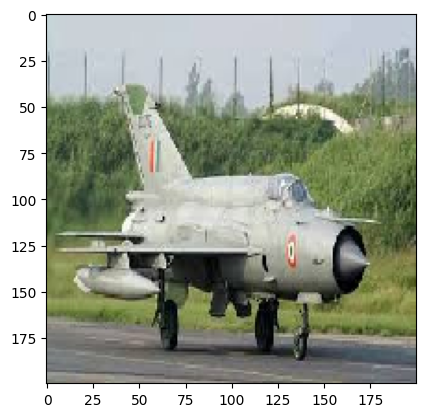

1/1 [==============================] - 0s 80ms/step
t6g.jpg Jet Detected


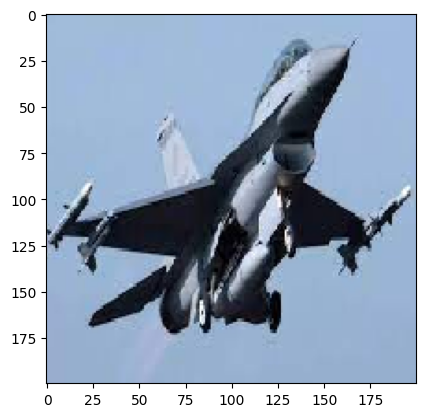

1/1 [==============================] - 0s 125ms/step
t2.jpg Jet Detected


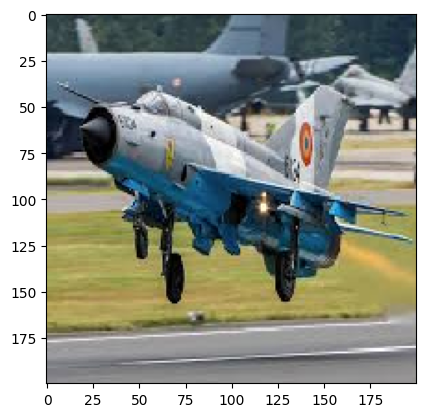

1/1 [==============================] - 0s 73ms/step
t7g.jpg Jet Detected


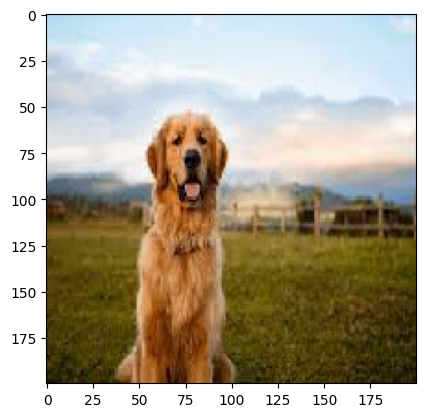

1/1 [==============================] - 0s 53ms/step
dog2.jpg Jet Detected


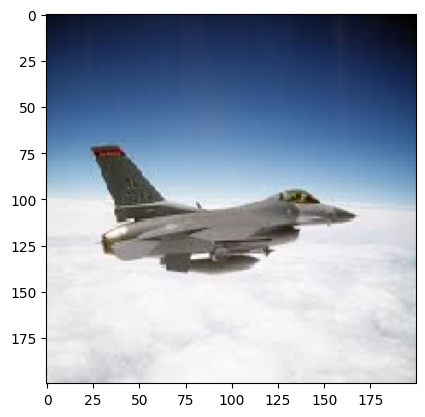

1/1 [==============================] - 0s 49ms/step
t1.jpg Jet Detected


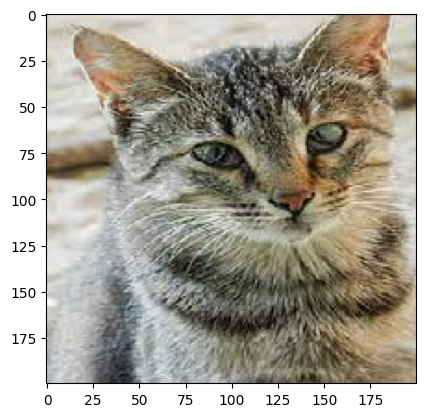

1/1 [==============================] - 0s 45ms/step
t3.jpg Jet Not Detected


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dir_path='/content/drive/MyDrive/nn-20240425T042532Z-001/nn/testing'
for i in os.listdir(dir_path):
  inp=load_img('/content/drive/MyDrive/nn-20240425T042532Z-001/nn/testing'+'/'+i,target_size=(200,200))
  plt.imshow(inp)
  plt.show()
  x=img_to_array(inp)
  x=np.expand_dims(x,axis=0)
  y=np.vstack([x])
  val=model.predict(y)
  if(val==0):
    print(i,'Jet Detected')
  else:
    print(i,'Jet Not Detected')
